# HD Calculations

### Imports

# HD hull

In [96]:
import pandas as pd
import plotly.express as px
import os
import sqlite3
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [221]:
def calcArea(in_area, in_hd):
    m = 35
    n = 35
    x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
    y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
    hull_min = ConvexHull(np.column_stack((x_min, y_min)))
    a = 214
    b = 107
    x_max = np.array([-a, a, -a, a, -a, a, -a, a, -a, a])
    y_max = np.array([-b, -b, b, b, -b, -b, b, b, -b, -b])
    hull_max = ConvexHull(np.column_stack((x_max, y_max)))

    hd_max = in_hd
    slices = 11
    hd_range = np.linspace(0, hd_max, slices)
    # hd_range = np.append(hd_range, 5)
    area_range = np.linspace(hull_min.volume, hull_max.volume, 10)
    # print(hd_range)
    # print(area_range)

    below_range = np.sum(in_area > area_range)
    # print(np.sum(in_area > area_range))
    return(hd_range[below_range])


def calcDistance(in_distance, in_hd):
    m = 35
    n = 35
    x_min = np.array([-m, m, -m, m, 0, m, 0, m, 0, 0])
    y_min = np.array([-n, -n, 0, 0, -n, -n, n, n, 0, 0])
    optimum_distance = np.sum(np.sqrt(x_min**2+y_min**2)) 

    a = 214
    b = 107
    x_max = np.array([-a, a, -a, a, -107.5, 107.5, -107.5, 107.5, -a, a])
    y_max = np.array([-b, -b, b, b, -b, -b, b, b, 0, 0])
    worst_distance = np.sum(np.sqrt(x_max**2+y_max**2))

    hd_max = in_hd
    slices = 11
    hd_range = np.linspace(0, hd_max, slices)
    # hd_range = np.append(hd_range, 5)
    area_range = np.linspace(optimum_distance, worst_distance, 10)
    # print(hd_range)
    # print(area_range)

    below_range = np.sum(in_distance > area_range)
    # print(np.sum(in_area > area_range))
    return(hd_range[below_range])

def calcError(x, y, in_hd):
    m = 35
    n = 35
    x_min = np.array([-m, m, -m, m, 0, m, 0, m, 0, 0])
    y_min = np.array([-n, -n, 0, 0, -n, -n, n, n, 0, 0])

    distance = np.sqrt(x_min**2+2*y_min**2)
    mean_distance = np.mean(distance)
    ce = np.sum(distance)/len(x_min)
    ve = np.sqrt(np.sum((distance - mean_distance)**2/len(x_min)))
    optimum_error = ce + ve

    a = 214
    b = 107
    x_max = np.array([-a, a, -a, a, -107.5, 107.5, -107.5, 107.5, -a, a])
    y_max = np.array([-b, -b, b, b, -b, -b, b, b, 0, 0])

    distance = np.sqrt(x_max**2+2*y_max**2)
    mean_distance = np.mean(distance)
    ce = np.sum(distance)/len(x_max)
    ve = np.sqrt(np.sum((distance - mean_distance)**2/len(x_max)))
    worst_distance = ce + ve

    hd_max = in_hd
    slices = 11
    hd_range = np.linspace(0, hd_max, slices)
    # hd_range = np.append(hd_range, 5)
    area_range = np.linspace(optimum_distance, worst_distance, 10)
    # print(hd_range)
    # print(area_range)

    below_range = np.sum(in_distance > area_range)
    # print(np.sum(in_area > area_range))
    return(hd_range[below_range])

## SQL Database connection    

In [214]:
connection = sqlite3.connect("trampoline.db")
cursor = connection.cursor()

0.3
Volume exercise: 6207.0
Volume min: 4900.0
Volume max: 91592.0


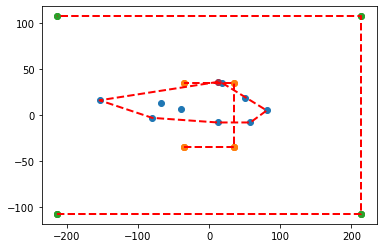

In [215]:
sql_str = "SELECT * from 'ed63e921b45f7b0137a59d2958912b22'"
df_exercisedata = pd.read_sql(sql_str, connection)
df_exercisedata['x'] = df_exercisedata.apply(lambda x: int(x['x']), axis=1)
x = df_exercisedata[['x']].values
df_exercisedata['y'] = df_exercisedata.apply(lambda x: int(x['y']), axis=1)
y = df_exercisedata[['y']].values
hull = ConvexHull(df_exercisedata[['x','y']])
hd = calcArea(hull.volume, in_hd=3)
print(hd)

plt.scatter(x, y)
plt.plot(x[hull.vertices], y[hull.vertices], 'r--', lw=2)

plt.plot(x[hull.vertices[0]], y[hull.vertices[0]], 'ro', alpha=0.5)

m = 35
n = 35
x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
hull_min = ConvexHull(np.column_stack((x_min, y_min)))
print('Volume exercise: {0}'.format(hull.volume))
print('Volume min: {0}'.format(hull_min.volume))
plt.scatter(x_min, y_min)
plt.plot(x_min[hull_min.vertices], y_min[hull_min.vertices], 'r--', lw=2)
x_max = np.array([-214, 214, -214, 214, -214, 214, -214, 214, -214, 214])
y_max = np.array([-107, -107, 107, 107, -107, -107, 107, 107, -107, -107])
hull_max = ConvexHull(np.column_stack((x_max, y_max)))
print('Volume max: {0}'.format(hull_max.volume))
plt.scatter(x_max, y_max)
plt.plot(x_max[hull_max.vertices], y_max[hull_max.vertices], 'r--', lw=2)

# HD Distance

In [223]:
m = 35
n = 35
x_min = np.array([-m, m, -m, m, 0, m, 0, m, 0, 0])
y_min = np.array([-n, -n, 0, 0, -n, -n, n, n, 0, 0])
optimum_distance = np.sum(np.sqrt(x_min**2+y_min**2)) 

a = 214
b = 107
x_max = np.array([-a, a, -a, a, -107.5, 107.5, -107.5, 107.5, -a, a])
y_max = np.array([-b, -b, b, b, -b, -b, b, b, 0, 0])
worst_distance = np.sum(np.sqrt(x_max**2+y_max**2)) 

calcDistance(np.sum(np.sqrt(df_exercisedata['x']**2+df_exercisedata['y']**2)), 5)

1.0

# HD Error

In [228]:
distance = np.sqrt(x**2+2*y**2)
mean_distance = np.mean(distance)
ce = np.sum(distance)/len(x)
ve = np.sqrt(np.sum((distance - mean_distance)**2/len(x)))

In [230]:
ce

66.5556913034548

In [232]:
ve+ce

101.24488205676053